In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to fit model input (28x28 images to 28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
# Create a Sequential model
model = models.Sequential()

# Add layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.8464 - loss: 0.4940 - val_accuracy: 0.9772 - val_loss: 0.0759
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 71s 72ms/step - accuracy: 0.9815 - loss: 0.0587 - val_accuracy: 0.9836 - val_loss: 0.0516
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.9879 - loss: 0.0392 - val_accuracy: 0.9872 - val_loss: 0.0398
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 77ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9898 - val_loss: 0.0367
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 71ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9883 - val_loss: 0.0387


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9858 - loss: 0.0442
Test accuracy: 0.9891


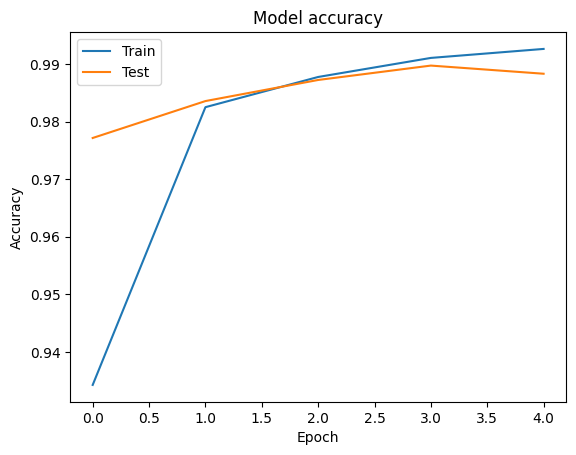

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
predictions = model.predict(x_test)

# Show the first prediction and corresponding true label
import numpy as np
predicted_label = np.argmax(predictions[0])
true_label = np.argmax(y_test[0])
print(f'Predicted label: {predicted_label}, True label: {true_label}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Predicted label: 7, True label: 7
